In [85]:
import os, numpy as np, sys
Info=[]
other = []
for i in range(1,11):
    for j in range(i+1,i+11):
        outerDist = .1*(j/i)**(2/3)
        if outerDist in other:
            continue
        pre = [i,j,.1, outerDist]
        Info.append(pre)
        other.append(outerDist)
copy = other.copy()
combo = list(np.linspace(.1, .5, 100)) + copy
combo.sort()

In [8]:
os.getcwd()

'/geode2/home/u100/taylor11/Carbonate/Downloads/Rebound/ReboundResonances/simAU/0.1_Earth/Masslists'

In [6]:
for i in ["0.1_Earth", "4_SuperEarth", "9.8_SuperEarth", "Earth", "Half_Earth", "Jupiter"]:
    os.chdir(i)
    for j in os.listdir():
        if "zba" in j or "zz" in j:
            os.remove(j)
    os.chdir("..")

In [7]:
os.chdir("0.1_Earth/Masslists")

In [9]:
os.listdir()

['0.1_Earthaug8BatchSORTED.txt',
 '0.1_Earthaug8Batch.txt',
 'empty.txt',
 '0.1_Earthjan1Batch.txt']

In [20]:
with open('0.1_Earthaug8BatchSORTED.txt') as file:
    contents = [line for line in file]
#print(contents)

string = ""
for i in contents: string += i
print(string)

simAU
Inner Planet Mass	Outer Planet Mass	Percent Difference	Distance
3.0000000000000004e-07	3.0000000000000004e-07	0.0	0.1	
3.0000000000000004e-07	3.0000000000000004e-07	0.0	0.10404040404040404	
3.0000000000000004e-07	3.0000000000000004e-07	0.0	0.10656022367666107* (10:11)	
3.0000000000000004e-07	3.0000000000000004e-07	0.0	0.10727659828951441* (9:10)	
3.0000000000000004e-07	3.0000000000000004e-07	0.0	0.10808080808080808	
3.0000000000000004e-07	3.0000000000000004e-07	0.0	0.10816871777305564* (8:9)	
3.0000000000000004e-07	3.0000000000000004e-07	0.0	0.10931035330127936* (7:8)	
3.0000000000000004e-07	3.0000000000000004e-07	0.0	0.11082332935251626* (6:7)	
3.0000000000000004e-07	3.0000000000000004e-07	0.0	0.11212121212121212	
3.0000000000000004e-07	3.0000000000000004e-07	0.0	0.11292432346572341* (5:6)	
3.0000000000000004e-07	3.0000000000000004e-07	0.0	0.11431418309001973* (9:11)	
3.0000000000000004e-07	3.0000000000000004e-07	0.0	0.1160397208403195* (4:5)	
3.0000000000000004e-07	3.0000000000

In [84]:
#np.zeros((10,2))
x = np.zeros((1000,2000))
y = np.zeros((1000,2000))
x[0] = [i for i in range(2000)]
y[0] = [i for i in range(0, 4000, 2)]
y[0][8]

16.0

In [87]:
combo[163]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/jackson/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-87-9b9dcb3bd297>", line 1, in <module>
    combo[163]
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/jackson/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'IndexError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/jackson/opt/anaconda3/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/Users/jackson/opt/anaco

IndexError: list index out of range

23 0.13103706971044482
Starting mass: 0.001. Starting Radius: 0.00029814534797077306.
Steps: 2
Beginning distance 0.13103706971044482.
Total steps: 2
distance: 0.13103706971044482 | 0 time = 0.0 years | 5 particles | 0 step number |
| 0.0 second | 0.0 minutes.

simAU distance: 0.13103706971044482 | 0.0 time = 0.0 years | 5 particles | 0 step number |
| 0.0 second | 0.0 minutes | 0.0 hours.

simAU distance: 0.13103706971044482 | 3.973835306318441 time = 0.632455532033676 years | 5 particles | 1 step number |
| 0.1 second | 0.0 minutes | 0.0 hours.

Done at 0 seconds!
Distance (done): 0.13103706971044482 | 3.973835306318441 time = 0.632455532033676 years | 5 particles | 2 step number |
| 0.1 second | 0.0 minutes | 0.0 hours.



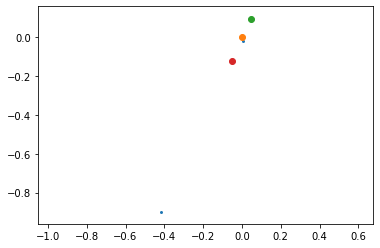

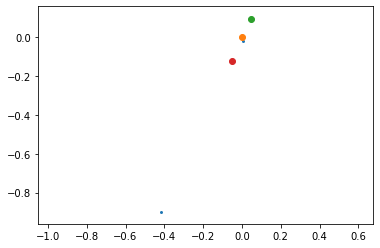

In [5]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:

import rebound, numpy as np, matplotlib as mpl
#mpl.use('Agg') # found here:https://stackoverflow.com/questions/4931376/generating-matplotlib-graphs-without-a-running-x-server
import matplotlib.pyplot as plt, time as tiempo, math, sys, os, argparse
from datetime import datetime

#os.system("taskset -p 0xff %d" % os.getpid()) # run on all cores

"""
What the following does is to make inputing command line arguments (CLargs) not only easier, but also restricts them to certain values.
"""


sim = rebound.Simulation()
tau = 2*np.pi
planetDestroyed = False

# In[3]:
class CustomException(Exception):
    def __init__(self, *args: object) -> None:
        super().__init__(*args)

jupiterMass, jupiterRadius = 1e-3, 4.7e-4 # Setting up some constants
earthMass, earthRadius = 3e-6, 4.3e-5
earthDensityProportion = earthMass / earthRadius**3
presentDirectory = 'Jupiter'
massDict = {"0.1_Earth": .1 * earthMass, "4_SuperEarth": 4 * earthMass, "9.8_SuperEarth": 9.8 * earthMass,
            "Earth": earthMass, "Half_Earth": .5 * earthMass, "Jupiter": jupiterMass}

startingMass = massDict[presentDirectory] # Setting up which radius to assign based on the mass
if startingMass >= jupiterMass: # some research shows that Jupiter's radius would not increase with an increase in mass
    startingRadius = jupiterRadius
if startingMass >= 3.9 * earthMass and startingMass <= 9.8 * earthMass: # Uses mass-radius relation from  https://arxiv.org/pdf/1312.0936.pdf
    startingRadius = earthRadius * (((startingMass/earthMass)/2.69)**(1/.93))
if startingMass < 3.9:
    startingRadius = (startingMass/earthDensityProportion)**(1/3)

def leaveGithub(top: str = "Rebound", end: str = "simAU") -> None:
    """
    This function goes up in directories until the pwd is 'top', then it navigates down to 'end.' 
    This is mostly designed for the 'saveFigs' function in order to save figures to a folder outside
    of the github repo. I want to keep my github repo well under 1 GB.
    """
    while os.getcwd().split("/")[-1] != top: #while the pwd is not the topmost desired directory
        os.chdir("..")
        if os.getcwd() == '/': 
            raise CustomException("The top directory does not exist above the beggining directory.")
    if not os.path.isdir(end): # this guarantees the 'end' directory is cd'ed to.
        final = ""
        for i, direc in enumerate(end.split('/')):
            try:
                final += f"{direc}/"
                os.mkdir(final)
            except FileExistsError:
                continue
    os.chdir(end)

def simAU(distance, R0 = startingRadius): #can set the sma of the second planet easily this way
    sim = rebound.Simulation()
    sim.add(m=1) #creates a star of mass 1
    sim.add(m=startingMass, a=.1, r=R0)  #creates a planet with mass 0.001 at 1 AU
    sim.add(m=startingMass, a=distance, f=np.pi, r=R0) 
    return sim
     
def rand_powerlaw(slope, min_v, max_v): #some distribution functions
    #https://rebound.readthedocs.io/en/latest/ipython/PrimordialEarth.html
    y = np.random.uniform()
    pow_max = pow(max_v, slope+1.)
    pow_min = pow(min_v, slope+1.)
    return pow((pow_max-pow_min)*y + pow_min, 1./(slope+1.))
def rand_uniform(minimum, maximum):
    return np.random.uniform()*(maximum-minimum)+minimum
def rand_rayleigh(sigma):
    return sigma*np.sqrt(-2*np.log(np.random.uniform()))

def quickplot(sim, AU = 0): 
    """
    Uses matplotlib to plot the orbit, instead of rebound. Setting AU to a value other than 0 allows this function
    to only plot objects closer than AU from the star.
    """
    coords = np.zeros((2,sim.N))
    for i in range(sim.N):
        if AU and np.linalg.norm(np.array(sim.particles[i].xyz)-np.array(sim.particles[0].xyz)) > AU: continue # Does not plot distance objects if AU != 0.
        coords[0][i], coords[1][i] = sim.particles[i].x, sim.particles[i].y
    fig, ax = plt.subplots()
    ax.axis('equal')
    ax.scatter(coords[0],coords[1],marker=".",linewidth=0)
    for i in range(sim.N_active):
        ax.scatter(sim.particles[i].x,sim.particles[i].y); # Planet
        
def my_merge(sim_pointer, collided_particles_index):
    """
    My merge logic. Assigns a hundredth of the planet's starting mass as the mass the planet gains as a result
    of the collision. If the planets collide, sets the planetDestroyed flag to True to indicate to quickCollect that
    it should cease integration.
    """
    
    #https://rebound.readthedocs.io/en/latest/ipython/User_Defined_Collision_Resolve.html
    #or
    #https://rebound.readthedocs.io/en/latest/ipython_examples/User_Defined_Collision_Resolve/
    
    sim = sim_pointer.contents # retreive the standard simulation object
    ps = sim.particles # easy access to list of particles

    i1 = collided_particles_index.p1   # Note that p1 < p2 is not guaranteed.
    j1 = collided_particles_index.p2
    
    if ps[i1]==0 and ps[j1]==0:
        print("both are asteroids")
        return 0
    elif ps[i1].m >= startingMass and ps[j1].m >= startingMass: # if the two planets collide
        global planetDestroyed
        print(f"TIME:{sim.t}")
        #raise CustomException("The planets collided!")
        planetDestroyed = True
        i = i1   
        j = j1
        print("#"*40+"\n"*3+"The planets collided!"+f"Time: {sim.t}"+"\n"*3+"#"*40)
        total_mass = ps[i].m + ps[j].m
        merged_planet = (ps[i] * ps[i].m + ps[j] * ps[j].m)/total_mass # conservation of momentum

        # merged radius assuming a uniform density
        merged_radius = (ps[i].r**3 + ps[j].r**3)**(1/3)

        ps[i] = merged_planet   # update p1's state vector (mass and radius will need corrections)
        ps[i].m = total_mass    # update to total mass
        ps[i].r = merged_radius # update to joined radius
        #raise CustomException("The planets collided!")
        return 2 # remove particle with index j
    else:
        if ps[i1].m==0: #assigns k as the planet with mass and l as the particle w/o mass
            k=j1
            l=i1
            destroyi1=True
        if ps[j1].m==0: #assigns k as the planet with mass and l as the particle w/o mass
            k=i1
            l=j1
            destroyi1=False
            
        '''fig, ax = rebound.OrbitPlot(sim, xlim = (-1.3, 1.3), ylim = (-1.3, 1.3), color=['blue', 'green'])
        ax.set_title("Merging particle {} into {}".format(j, i))
        ax.text(ps[k].x, ps[k].y, "1");
        ax.text(ps[l].x, ps[l].y, "2")'''
        # So we plot the scenario exactly at the timestep that the collision function is triggered
        
        #print("merging particle", k,'into particle', l) #use this to know when collisions occur
        
        #particle_mass = Mtot_disk/N_pl
        #particle_mass=1e-5
        particle_mass = startingMass/100
        particle_radius = 1e-5
        # Merging Logic
        total_mass = ps[k].m + particle_mass
        merged_planet = (ps[k] * ps[k].m + ps[l] * particle_mass)/total_mass # conservation of momentum

        # merged radius assuming a uniform density
        merged_radius = (ps[k].r**3 + particle_radius**3)**(1/3)

        ps[k] = merged_planet   # update p1's state vector (mass and radius will need corrections)
        ps[k].m = total_mass    # update to total mass
        ps[k].r = merged_radius # update to joined radius
        
        #sim.ri_whfast.recalculate_coordinates_this_timestep = 1 #after adding mass
        #to a particle, we must recalculate Jacobi coordinates in order to recieve
        #physical values. Note that this code should be commented out if safemode is on.
        
        if destroyi1:
            return 1 #destroys p1, which is the particle w/o mass
        else:
            return 2 #destroys p2, which is the particle w/o mass

def masslist_txt_append(masslist, filepath,sim = None, write_type = 'a', **kwargs):
    """
    Saves the masslists into a formatted txt file. This is similar to masslist_txt except 
    it lends itself better to appending. It is meant for simulations ran entirely separately.
    """
    
    def avg(listt):
        sum = 0
        for i in listt:
            sum += i
        return sum / len(listt)
    
    masslistcopy = masslist.copy() # Don't want to edit the original data
    message = ''
    if not os.path.isdir("Masslists"):
        os.mkdir("Masslists")
    if kwargs.get('first') or not os.path.isfile(filepath): # If file does not exist, create it. If sys.argv[1]==0,
                                                            #then will also create.                                                          
        write_type = "w"
        message += sim+'\n'
        message+="Inner planet mass\tOuter planet mass\tPercent Difference\tDistance\n"
    for data in masslistcopy[1:]:
        #data = data.copy() #comment out this line to not have the original list change
        percentdif = abs((data[0]-data[1])/data[0])*100
        roundedpercentdif = round(percentdif,2)
        data.insert(2,percentdif)
        for j in data:
            message += str(j)
            message +='\t'
        message +='\n'    
    with open(filepath,write_type) as file:
        file.write(message)

    if kwargs.get('last') and len(masslist_read(filepath))/4 >= kwargs.get("lastN"):
        with open(filepath, "a") as file:
            file.write("\nAverage percent difference: {}"
                       .format(averagePercent(filepath)))
            file.write("\n"+"#"*40)

    if kwargs.get("leaveGithub"):
        beginning = os.getcwd()
        leaveGithub(top = kwargs.get("leaveGithub"), end = kwargs.get("leaveEnd")) # I want to save to both the repo and the non-repo Masslists directory
        masslist_txt_append(masslist, filepath, sim, write_type, leaveGithub = False) # Using all the same parameters except setting recursion to False.
        os.chdir(beginning) # Return to where it started


# In
def masslist_read(filePath):
    """
    Inverse of masslist_txt(). Used in masslist_txt_append to determine if the average percent should be calculated.
    """
    with open(filePath,'r') as datafile:
        contents = datafile.read()
    contents = contents.split()
    finalList = []
    for index,value in enumerate(contents):
        try:
            value = float(value)
            finalList.append(value)
            ####contents[index] = value
        except:
            pass
    ####for i in range(0,int(len(contents)), 4):
        ####finalList.append([contents[i:i+4]])
    return finalList
#masslist_read('test.txt')

def avg(listt, **kwargs):
    """
    Average function for different conditions.
    """
    sum = 0
    length = len(listt)
    if kwargs.get('positive'): # Does not include values that are NOT positive into the average
        for i in listt:
            if i > 0:
                sum += i
            else:
                length -= 1
        if length == 0:
            return 0
        return sum / length
    if kwargs.get('nonNegative'): # Does not include values that are NOT non-negative into the average
        for i in listt:
            if i >= 0:
                sum += i
            else:
                length -= 1
        if length == 0:
            return 0
        return sum / length
    for i in listt: # Normal average
        sum += i
    return sum / len(listt)

def averagePercent(filePath): # reads average percent from a filepath
    dataList = masslist_read(filePath)
    percentList = []
    for i in range(2,len(dataList),4):
        percentList.append(dataList[i])
    return avg(percentList)

# In[4]:

def saveFigs(innerFolder = "", addOn = "", distance = None, **kwargs):
    """
    This saves several types of graphs into a folder corresponsing to the seed.
    Optional ability to add on to the name of a file easily.
    NOTE: Depending on the stepnumber, some of these graphs may contain trivial data,
    because for some data types the stepnumber needs to be very high.
    """
    beginning = os.getcwd()

    if kwargs.get("test") or distance == None:
        distance = "Tests"
#     def folderChecker():
#         if innerFolder:
#             innerFolder += "/"
#             if not os.path.isdir("Figures/"+innerFolder):
#                 os.mkdir("Figures/"+innerFolder)
#             if not os.path.isdir("Figures/"+innerFolder+str(distance)):
#                 os.mkdir("Figures/"+innerFolder+str(distance))
#             if not os.path.isdir("Figures/"+innerFolder+str(distance)+"/Arrays"):
#                 os.mkdir("Figures/"+innerFolder+str(distance)+"/Arrays")
#     def recursiveFolderChecker():
#         try:
#             folderChecker()
#         except FileExistsError:
#             tiempo.sleep(np.random.uniform()*3)
#             recursiveFolderChecker()
#     recursiveFolderChecker()
    if kwargs.get("leaveGithub"):
        leaveGithub(top = kwargs.get("leaveGithub"), end = kwargs.get("leaveEnd")) # Leave the github repo and go to its twin outside of the repo.
        #This way I do not have to push gigabytes of graphs to github.

    if innerFolder:
        innerFolder += "/"
        if not os.path.isdir("Figures"):
            os.mkdir("Figures")
        if not os.path.isdir("Figures/"+innerFolder):
            os.mkdir("Figures/"+innerFolder)
        if not os.path.isdir("Figures/"+innerFolder+str(distance)):
            os.mkdir("Figures/"+innerFolder+str(distance))
        if not os.path.isdir("Figures/"+innerFolder+str(distance)+"/Arrays"):
            os.mkdir("Figures/"+innerFolder+str(distance)+"/Arrays")
    
    np.savez("Figures/"+innerFolder+str(distance)+"/graph_data_arrays", times=times, dist=dist, relative_x_value=relative_x_value, relative_y_value=relative_y_value,\
    eccs=eccs, position1=position1, position2=position2, interplanetdistance=interplanetdistance, masses=masses,\
    particleNumber=particleNumber, asteroidAU=asteroidAU, asteroidEccs=asteroidEccs, asteroidX=asteroidX, asteroidY=asteroidY)

    plt.clf() # clears any graphs
    quickplot(sim)
    plt.savefig("Figures/"+innerFolder+str(distance)+"/quickplot"+addOn+".pdf")

    plt.clf()
    rebound.OrbitPlot(sim,slices=0.3,color=True)
    plt.savefig("Figures/"+innerFolder+str(distance)+"/reboundPlot"+addOn+".pdf")

    plt.clf()
    rebound.OrbitPlot(sim, slices = .3, color = True, lw = 1, plotparticles = [1,2])
    plt.savefig("Figures/"+innerFolder+str(distance)+"/reboundPlotOnlyPlanets"+addOn+".pdf")

    plt.clf()
    plt.plot(times, eccs)
    plt.title('Eccentricity Over Time')
    plt.xlabel('Time (2pi*yr)')
    plt.ylabel('Eccentricity')
    plt.savefig("Figures/"+innerFolder+str(distance)+"/Eccentricity"+addOn+".pdf")
    np.save("Figures/"+innerFolder+str(distance)+"/Arrays/Eccentricity"+addOn, eccs)
    np.save("Figures/"+innerFolder+str(distance)+"/Arrays/times"+addOn, times)

    plt.clf()
    plt.plot(times, relative_x_value)
    plt.title('X Value From Star Over Time')
    plt.xlabel('Time (2pi*yr)')
    plt.ylabel('X Value (AU)')
    plt.savefig("Figures/"+innerFolder+str(distance)+"/relativeXValue"+addOn+".pdf")
    np.save("Figures/"+innerFolder+str(distance)+"/Arrays/relativeXValue"+addOn, relative_x_value)

    plt.clf()
    plt.plot(times, masses)
    plt.title('Mass of Planets Over Time')
    plt.xlabel('Time (2pi*yr)')
    plt.ylabel('Mass (Solar Masses)')
    plt.savefig("Figures/"+innerFolder+str(distance)+"/masses"+addOn+".pdf")
    np.save("Figures/"+innerFolder+str(distance)+"/Arrays/masses"+addOn, masses)

    plt.clf()
    fig, axs = plt.subplots(1, 2)
    fig.suptitle('Planet Positions')
    axs[0].plot(list(position1[:,0]), list(position1[:,1]),'o')
    axs[1].plot(list(position2[:,0]), list(position2[:,1]),'o')
    axs[0].set_aspect('equal')
    axs[1].set_aspect('equal')
    plt.savefig("Figures/"+innerFolder+str(distance)+"/scatterPlotPositions"+addOn+".pdf")

    plt.clf()
    plt.plot(times, interplanetdistance)
    plt.title('Interplanetary Distance Over Time')
    plt.xlabel('Time (2pi*yr)')
    plt.ylabel('Distance (AU)')
    plt.savefig("Figures/"+innerFolder+str(distance)+"/interplanetaryDistance"+addOn+".pdf")
    np.save("Figures/"+innerFolder+str(distance)+"/Arrays/inderplanetaryDistance"+addOn, interplanetdistance)

    plt.clf()
    plt.plot(times, particleNumber)
    plt.title('sim.N over time')
    plt.xlabel('Time (2pi*yr)')
    plt.ylabel('sim.N (AU)')
    plt.savefig("Figures/"+innerFolder+str(distance)+"/particleNumber"+addOn+".pdf")
    np.save("Figures/"+innerFolder+str(distance)+"/Arrays/particleNumber"+addOn, particleNumber)

    plt.clf()
    plt.plot(times, asteroidEccs[:,[i for i in range(0,simNi-2-1,50)]], linewidth=1)
    plt.title('Asteroid Eccentricity Over Time')
    plt.xlabel('Time (2pi*yr)')
    plt.ylabel('Eccs')
    plt.savefig("Figures/"+innerFolder+str(distance)+"/RoidEccs"+addOn+".pdf")
    np.save("Figures/"+innerFolder+str(distance)+"/Arrays/asteroidEccs"+addOn, asteroidEccs)

    plt.clf()
    plt.plot(times, [avg(EccsList, nonNegative = True) for EccsList in asteroidEccs],linewidth=1)
    plt.title('Asteroid Eccentricity AVERAGE Over Time')
    plt.xlabel('Time (2pi*yr)')
    plt.ylabel('Eccentricity')
    plt.savefig("Figures/"+innerFolder+str(distance)+"/RoidEccsAverage"+addOn+".pdf")

    plt.clf()
    num_bins = 30
    plt.hist([data for data in asteroidEccs[-1] if data >= 0], num_bins)
    plt.savefig("Figures/"+innerFolder+str(distance)+"/RoidEccsHistoEnd"+addOn+".pdf")

    plt.clf()
    plt.plot(times, asteroidAU[:,[i for i in range(0,simNi-2-1,50)]], linewidth=1)
    # Does not plot every asteroid
    plt.title('Asteroid Semi Major Axis Over Time')
    plt.xlabel('Time (2pi*yr)')
    plt.ylabel('Semi Major Axis (AU)')
    plt.ylim(bottom=-.3, top = 5) # Only want to graph part of escaping asteroids
    plt.savefig("Figures/"+innerFolder+str(distance)+"/RoidSMAxis"+addOn+".pdf")
    np.save("Figures/"+innerFolder+str(distance)+"/Arrays/asteroidAU"+addOn, asteroidAU)

    plt.clf()
    plt.plot(times, [avg(asteroidAUList, positive = True) for asteroidAUList in asteroidAU],linewidth=1)
    plt.title('Asteroid Semi Major Axis AVERAGE Over Time')
    plt.xlabel('Time (2pi*yr)')
    plt.ylabel('Semi Major Axis (AU)')
    plt.savefig("Figures/"+innerFolder+str(distance)+"/RoidSMAxisAverage"+addOn+".pdf")

    plt.clf()
    num_bins =30
    plt.hist([data for data in asteroidAU[0] if data > 0], num_bins)
    plt.savefig("Figures/"+innerFolder+str(distance)+"/RoidSMAxisHistoStart"+addOn+".pdf")

    plt.clf()
    plt.hist([data for data in asteroidAU[-1] if data > 0], num_bins)
    plt.savefig("Figures/"+innerFolder+str(distance)+"/RoidSMAxisHistoEnd"+addOn+".pdf")

    os.chdir(beginning) # Return back to original directory
    print(f"Final directory is {os.getcwd()}.")

    ###########################################################################################

def generateSystem(sma, simulation = simAU,seed = None, asteroidnumber = 1000):  
    """
    Generates a system of two planets using the simAU definition to begin with, by default. 
    Populates the system with a given number of asteroids, using a linear spacing for their starting sma.
    Assigns hashes accordingly.
    """

    sim = simulation(sma)
    sim.N_active = sim.N

    sim.integrator = "ias15"
    #sim.integrator = "whfast"
    #sim.ri_whfast.corrector = 0 #zero order corrector for better speed
    #sim.ri_whfast.safe_mode = 0 #turns off safemode, *substantial* speed boost
    #sim.dt = 0.001*2*np.pi #mutiple by 2pi if in units such that G=1
    sim.testparticle_type = 0
    sim.ri_ias15.min_dt = 1e-8 # ensure that close encounters do not stall the integration

    #collision and boundary options
    sim.collision = "direct"
    sim.collision_resolve = my_merge
    sim.collision_resolve_keep_sorted = 1
    sim.boundary = "open"
    boxsize = 100
    sim.configure_box(boxsize)
    sim.track_energy_offset = 1

    N_pl = asteroidnumber                # Number of planetesimals
    Mtot_disk = 10*sim.particles[1].m    # Total mass of planetesimal disk
    m_pl = 0 #Mtot_disk / float(N_pl)    # Mass of each planetesimal
    r_pl = 2e-9 

    #seed = 0
    innerRad, outerRad = .02, 1 #distance * 3
    auList = np.linspace(innerRad, outerRad, asteroidnumber) # use this to NOT randomize the starting distance
    index = 0
    if not seed == 'strict':
        np.random.seed(seed) # by setting a seed we will reproduce the same simulation every time
    else:
        np.random.seed(0)
    while sim.N < (N_pl + sim.N_active):
        #a = rand_powerlaw(0, 0.1, 3) 
        a = rand_uniform(innerRad, outerRad)
        if seed == 'strict':
            a = auList[index]
        #e = rand_rayleigh(0.01) by default is 0
        e=0
        #inc = rand_rayleigh(0.005)
        inc=0
        f = rand_uniform(-np.pi,np.pi)
        p = rebound.Particle(simulation=sim,primary=sim.particles[0], r=r_pl, a=a, f=f)
        # Only add planetesimal if it's far away from the planet
        d1 = np.linalg.norm(np.array(p.xyz)-np.array(sim.particles[1].xyz))
        d2 = np.linalg.norm(np.array(p.xyz)-np.array(sim.particles[2].xyz))
        d = min(d1,d2)
        if d>5e-4:
            sim.add(p)
            index += 1

    # Hash Creation
    ps = sim.particles
    ps[0].hash = "star"
    ps[1].hash = "innerPlanet"
    ps[2].hash = "outerPlanet"
    for i in range(3,sim.N): # this sets their hash to their starting particle number
        ps[i].hash = str(i)

    sim.collision_resolve = my_merge

    #sim.move_to_com()
    E0 = sim.calculate_energy()
    #quickplot(sim)
    return sim
    
def quickcollect2(n, Ti, Tf, stepnumber, distance, asteroidCollect = False,**kwargs): 
    """
    Collects orbital data on the first two bodies in a system and the asteroids as well if asteroidCollect is set to True.
    """
    initialtime = tiempo.monotonic()
#     n=2 #number of planets
#     T=80*2*np.pi #years of simulation
    # Planet variables
    global times, dist, relative_x_value,relative_y_value, eccs, position1, position2, \
    interplanetdistance, masses, particleNumber
    times = np.linspace(Ti,Tf,stepnumber)
    #diftimes = list()
    dist = np.zeros((len(times),n)) 
    relative_x_value = np.zeros((len(times),n))
    relative_y_value = np.zeros((len(times),n))
    eccs = np.zeros((len(times),n))
    position1 = np.zeros((len(times),2))
    position2 = np.zeros((len(times),2))
    interplanetdistance = np.zeros((len(times),1))
    particleNumber = np.zeros((len(times),1))
    masses = np.zeros((len(times),n))
    ps = sim.particles
    # Asteroid variables:
    global asteroidAU, asteroidEccs, simNi, asteroidX, asteroidY
    simNi = sim.N
    asteroidAU = np.zeros((len(times),simNi-n-1)) # n is the number of planets, 1 is the number of stars
    asteroidEccs = np.negative(np.ones((len(times),simNi-n-1)))
    asteroidX = np.zeros((len(times),simNi-n-1))
    asteroidY = np.zeros((len(times),simNi-n-1))
    #
    print(f"Total steps: {stepnumber}")
    print("distance: {} | {} time = {} years | {} particles | {} step number |\n| {} second | {} minutes.\n"\
    .format(distance,0,0/tau,sim.N,0,round((tiempo.monotonic()-initialtime),1)\
    ,round((tiempo.monotonic()-initialtime)/60,1)))
    #
    for i, t in enumerate(times):
        if planetDestroyed:
            break # not interested in what happens in systems where the planets collide
        sim.integrate(t)
        print("simAU distance: {} | {} time = {} years | {} particles | {} step number |\n\
| {} second | {} minutes | {} hours.\n"\
        .format(distance,t,t/tau,sim.N,i,round((tiempo.monotonic()-initialtime),1)\
        ,round((tiempo.monotonic()-initialtime)/60,1),round((tiempo.monotonic()-initialtime)/3600,1)))
        #sim.ri_whfast.recalculate_coordinates_this_timestep = 1
        #sim.integrator_synchronize()
        #diftimes.append(sim.t+dT)
        #if i== int(stepnumber/2):
            #print("1/2 done at {} seconds.".format(int(tiempo.time() - initialtime)))
        ps = sim.particles
        interplanetdistance[i] = np.linalg.norm(np.array(ps[2].xyz)-np.array(ps[1].xyz))
        particleNumber[i] = sim.N
        position1[i] = [ps[1].x,ps[1].y]
        position2[i] = [ps[2].x,ps[2].y]
        for planet in range(n):
            planetdif = planet+1
            dist[i,planet] = np.linalg.norm(np.array(ps[planetdif].xyz)-np.array(ps[0].xyz))
            relative_x_value[i,planet] = ps[planetdif].x - ps[0].x
            relative_y_value[i,planet] = ps[planetdif].y - ps[0].y
            eccs[i,planet] = ps[planetdif].e
            masses[i,planet] = ps[planetdif].m
        position1[i] = [relative_x_value[i,0],relative_y_value[i,0]]
        position2[i] = [relative_x_value[i,1],relative_y_value[i,1]]
        #### Data collection from asteroids:
        if asteroidCollect:
            for roidNumber in range(3,simNi):
                #print("index:{}, roidNumber: {}".format(index,roidNumber))
                index = roidNumber - n -1
                try:                    
                    asteroidAU[i,index] = ps[str(roidNumber)].a # Using a string so that the hash will be used
                    asteroidEccs[i,index] = ps[str(roidNumber)].e
                    asteroidX[i, index] = ps[str(roidNumber)].x
                    asteroidY[i, index] = ps[str(roidNumber)].y
                except rebound.ParticleNotFound:
                    continue # The asteroid has been destroyed, move onto the next one.
        ####
    finaltime = tiempo.monotonic()
#     print('done')
    #print("{} done at {} seconds!".format((a+1)/10,int(finaltime-initialtime)))
    print("Done at {} seconds!".format((int(finaltime-initialtime))))
#     print("The inner planet ended with a mass of {}.".format(ps[1].m))
#     print("The outer planet ended with a mass of {}.".format(ps[2].m))
#     print("There are {} particles remaining.".format(sim.N))
    #
    print("Distance (done): {} | {} time = {} years | {} particles | {} step number |\n| {} second | {} minutes | {} hours.\n"\
    .format(distance,sim.t,sim.t/tau,sim.N,stepnumber,round((tiempo.monotonic()-initialtime),1)\
    ,round((tiempo.monotonic()-initialtime)/60,1), round((tiempo.monotonic()-initialtime)/3600,1)))
    #
    quickplot(sim)
    #ding()
    
def remove(AU, sim = sim):
    """
    Removes particles from the system if they are AU away from the star.
    """
    for i in reversed(range(sim.N)):
        ps = sim.particles
        if np.linalg.norm(np.array(ps[i].xyz)-np.array(ps[0].xyz)) > AU:
            sim.remove(i)

######################################################################################################################################################################################
######################################################################################################################################################################################
# The following implements a list of distances that produce known resoances
# combined with an interwoven linear spacing
Info=[]
other = []
for i in range(1,11):
    for j in range(i+1,i+11):
        outerDist = .1*(j/i)**(2/3)
        if outerDist in other:
            continue
        pre = [i,j,.1, outerDist]
        Info.append(pre)
        other.append(outerDist)
copy = other.copy()
combo = list(np.linspace(.1, .5, 100)) + copy
combo.sort()
info = int(23)
print(info, combo[info])
print(f"Starting mass: {startingMass}. Starting Radius: {startingRadius}.")
distance = combo[info] # this selects the distance
revolutionsOfInnerPlanet = 20 # The following sets up and runs the simulation, collecting data every setRevFreq revolutions
#endTime = 10000 #years of simulation
revTime = 0.1**1.5 # time for one revolution of the inner planet at the very beginning at least
endTime = revTime * revolutionsOfInnerPlanet
simAU_masses = [['inner planet mass', 'outer planet mass','distance']]
BIGinitial = tiempo.monotonic()
stepRevFreq = 10 # how often a step should occur in units of revolutions of the inner planet
stepFrequency = stepRevFreq * revTime  # how often should a step occur (years)
#steps = int(endTime/stepFrequency) # Will round down to an integer
steps = int(revolutionsOfInnerPlanet/stepRevFreq)
print(f"Steps: {steps}")
print("Beginning distance {}.".format(distance))
sim = generateSystem(simulation = simAU, seed ='strict', asteroidnumber = 2, sma = distance)
quickcollect2(n=2, Ti = 0 * tau, Tf=endTime * tau, stepnumber = steps, asteroidCollect = True, distance = distance) # Can override 'steps' by setting a value directly
quickplot(sim)

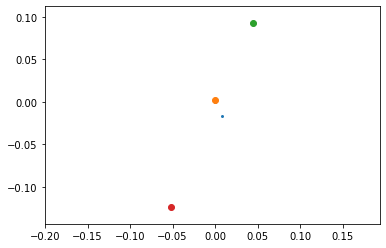

In [6]:
quickplot(sim, AU = 0.6)

In [10]:
asteroidX[:,1], asteroidY[:,1]

(array([ 0.9604982 , -0.41660224]), array([ 0.27828619, -0.9026344 ]))